In [24]:
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
from pprint import pprint
import torch

# Gambler's Problem

In [103]:
class Gambler:

    def __init__(self, 
                 goal = 100,
                 p = 0.4        # heads probability
                 ):
        
        self.goal = goal
        self.p = p

        self.Sp = list(range(goal+1))
        self.S = self.Sp[1:goal]

        self.A = [ list( range(1, min(s, goal - s) + 1) ) for s in self.S ]       # Actions. State s corresponds to A[s-1].

    def r(self, s, a):
        return self.p if s+a==self.goal else 0

    def value_iter(self, max_iter = 1000, theta = 0.95):
        
        # init value function
        v = [0 for s in self.Sp]    # first and last states are terminal

        delta = 0
        i = 0
        bar = tqdm(total = max_iter)

        while True:
            for s in self.S:
                v_old = v[s]
                
                v[s] = max([self.r(s,a) + self.p * v[s+a] + (1-self.p) * v[s-a] for a in self.A[s-1]])

                delta = max(delta, abs(v_old - v[s]))

            i += 1
            bar.update(1)
            
            if i == max_iter: 
                break
            
            # if delta < theta:
            #     print(i)
            #     break

        bar.close()
        
        # Compute policy
        pi = []

        for s in self.S:
            rhs = [self.r(s,a) + self.p * v[s+a] + (1-self.p) * v[s-a] for a in self.A[s-1]]
            v_max = max(rhs)
            a_opt = [a for a in self.A[s-1] if rhs[a-1] == v_max] # rhs.index(v_max)
            pi.append(a_opt)
        
        self.v_opt, self.pi_opt = v, pi

    
    def plot_opt(self, f = 'policy', policy_filter = max):
        if f == 'value':
            plt.scatter(self.S, self.v_opt[1:-1], s = 1)
        elif f == 'policy':
            policy = [policy_filter(self.pi_opt[s-1]) for s in self.S]
            plt.scatter(self.S, policy, s = 2)
            plt.title(policy_filter.__name__)

        plt.xlabel('capital')
        plt.ylabel(f)

        plt.show()

## p = 0.4

First, let's try to reproduce the results in Sutton-Barto. Instead of given error $\theta$ we will use a given number of approximation to terminate.

In [104]:
G_100 = Gambler(goal = 100, p = 0.4)
G_100.value_iter(max_iter = 1000)

  0%|          | 0/1000 [00:00<?, ?it/s]

The value function is similar to Sutton-Barto fig. 4.3. 

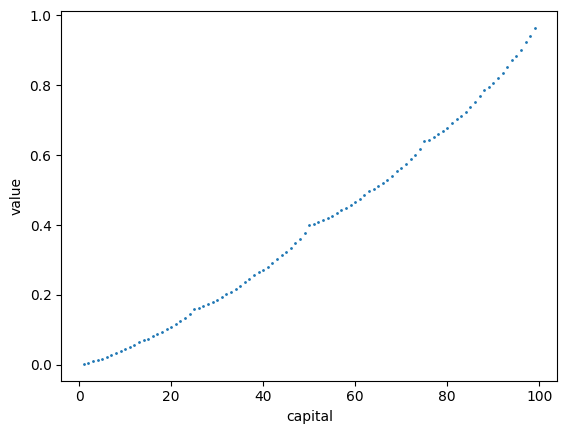

In [105]:
G_100.plot_opt('value')

For the policy, we computed all optimal actions for each state, i.e. pi_100[s-1] is the set of *all* optimal actions for the state s (shift by -1 because states start from 1: s = 1,..., 99).

In [106]:
pprint(G_100.pi_opt, width = 150, compact=True)

[[1], [2], [3], [4], [5], [6], [7], [8], [9], [10], [11], [12], [12, 13], [11, 14], [10, 15], [16], [17], [18], [6, 19], [5, 20], [4, 21], [3, 22],
 [2, 23], [1], [25], [1, 24, 26], [2, 23, 27], [3, 22, 28], [4, 21, 29], [5], [6, 19, 31], [32], [8, 17, 33], [9, 16], [10, 35], [11, 14], [13, 37],
 [12], [39], [10], [9, 41], [8, 42], [7, 43], [6], [5], [4, 46], [3], [2, 48], [49], [50], [1], [2, 48], [3, 47], [4, 46], [45], [6, 44], [7],
 [8, 42], [9, 41], [10, 40], [39], [12, 38], [37], [14], [35], [9, 16, 34], [8, 17, 33], [7, 18, 32], [6, 19, 31], [5, 30], [21, 29], [3, 22, 28],
 [2, 23, 27], [24], [25], [1, 24], [2, 23], [3, 22], [4, 21], [5, 20], [6, 19], [18], [8, 17], [16], [10, 15], [11, 14], [13], [12], [11], [10], [9],
 [8], [7], [6], [5], [4], [3], [2], [1]]


For example, we can take the minimal bet size for each action:

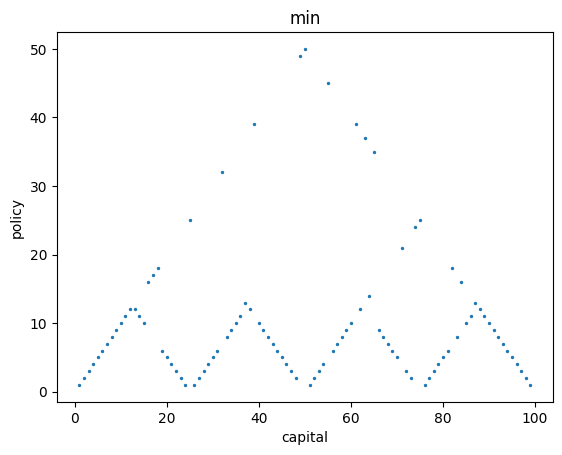

In [107]:
G_100.plot_opt('policy', min)

This is very close to fig. 4.3 in Sutton-Barto. It would presumably converge precisely to their answer if we ran value iteration for longer and with more precision.

Alternatively, we can bet the maximum among the optimum actions:

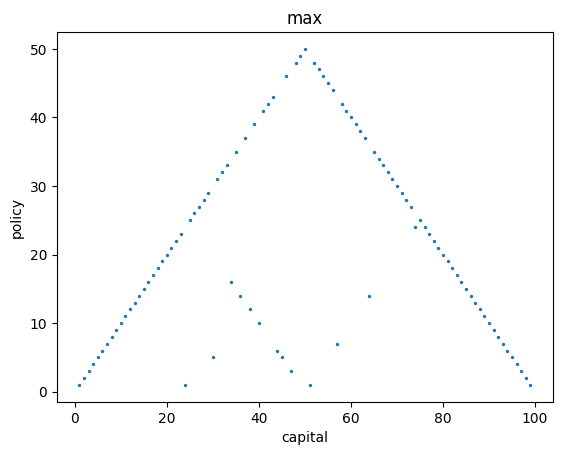

In [108]:
G_100.plot_opt('policy', max)

This seems to converge to a policy that linearly increases, turns around in the middle, and linearly decays.

In fact, this is easier (why?) to see if we set the goal to be 99 instead of 100:

In [109]:
G_99 = Gambler(goal = 99, p = 0.4)
G_99.value_iter(max_iter = 1000)

  0%|          | 0/1000 [00:00<?, ?it/s]

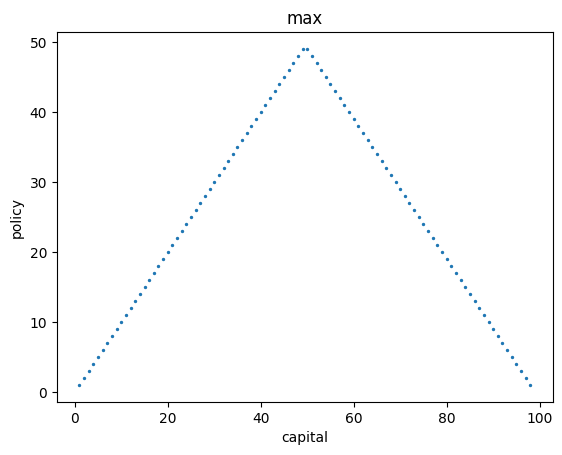

In [110]:
G_99.plot_opt('policy', max)

In this case there is in fact a unique policy and a unique action for each state:

In [111]:
pprint(G_99.pi_opt, width = 150, compact=True)

[[1], [2], [3], [4], [5], [6], [7], [8], [9], [10], [11], [12], [13], [14], [15], [16], [17], [18], [19], [20], [21], [22], [23], [24], [25], [26],
 [27], [28], [29], [30], [31], [32], [33], [34], [35], [36], [37], [38], [39], [40], [41], [42], [43], [44], [45], [46], [47], [48], [49], [49], [48],
 [47], [46], [45], [44], [43], [42], [41], [40], [39], [38], [37], [36], [35], [34], [33], [32], [31], [30], [29], [28], [27], [26], [25], [24], [23],
 [22], [21], [20], [19], [18], [17], [16], [15], [14], [13], [12], [11], [10], [9], [8], [7], [6], [5], [4], [3], [2], [1]]


## p = 0.25

Now we solve the exercise 4.9.

In [118]:
g25 = Gambler(goal = 100, p = 0.25)
g25.value_iter(max_iter = 1000)

  0%|          | 0/1000 [00:00<?, ?it/s]

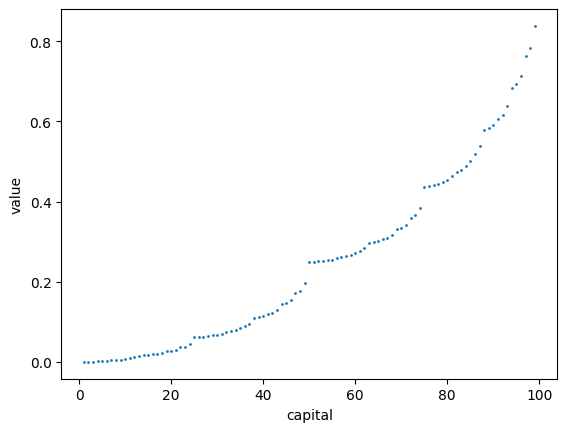

In [119]:
g25.plot_opt('value')

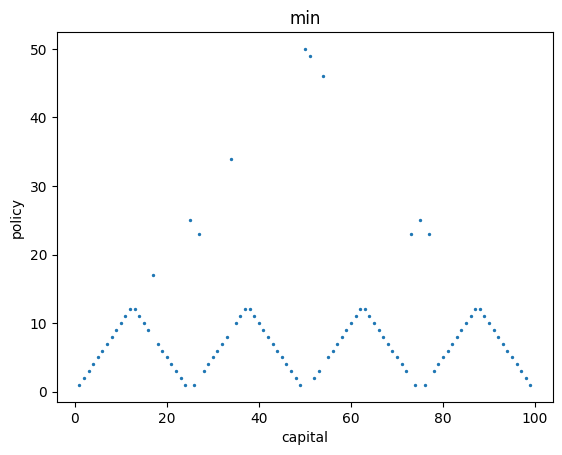

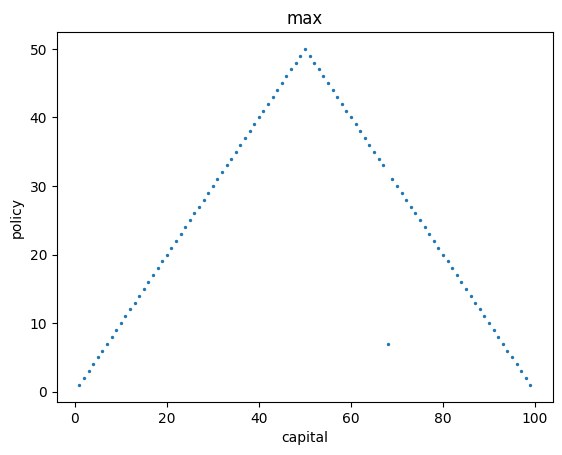

In [120]:
g25.plot_opt('policy', min)
g25.plot_opt('policy', max)

## p = 0.55

In [144]:
g55 = Gambler(goal = 100, p = 0.55)
g55.value_iter(max_iter = 1000)

  0%|          | 0/1000 [00:00<?, ?it/s]

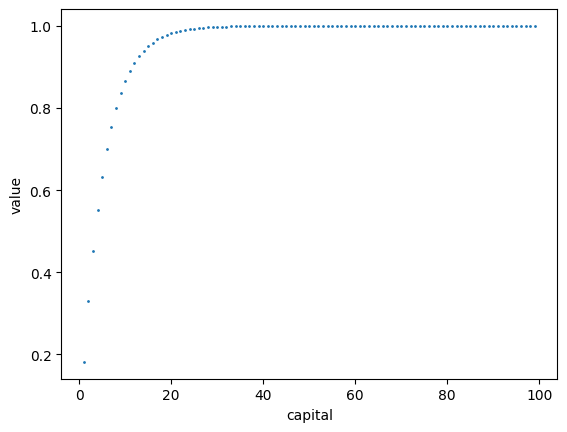

In [145]:
g55.plot_opt('value')

For p = 0.55 (and p > 0.5 more generally) the value function is qualitatively different from p < 0.5. 

The optimal policy turns out to be to just bet $1 in every bet:

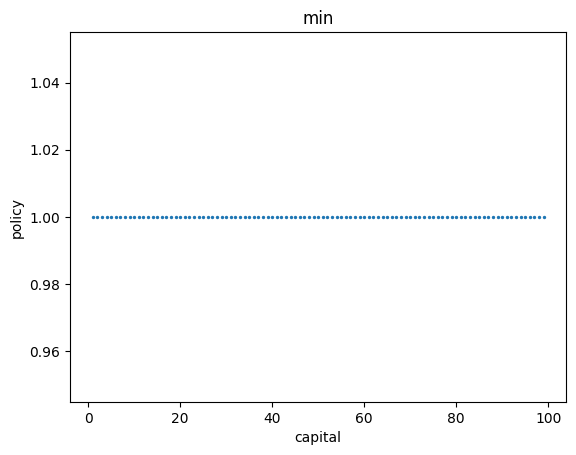

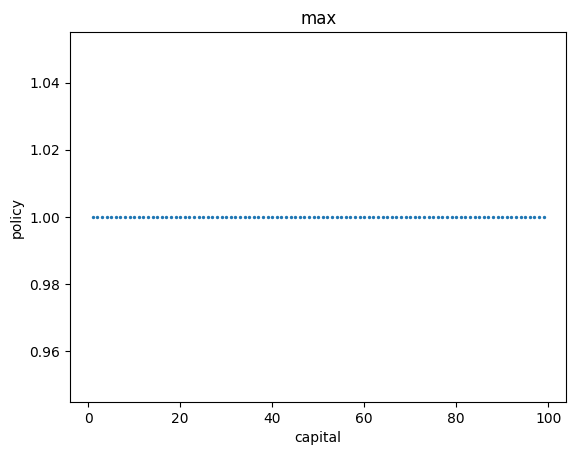

In [146]:
g55.plot_opt('policy', min)
g55.plot_opt('policy', max)

This makes sense, since the odds are in our favor p > 0.5.